In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

In [79]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [80]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

X_train = train.iloc[:,:-2]
y_train = train['Activity']

X_test= test.iloc[:,:-2]
y_test = test['Activity']

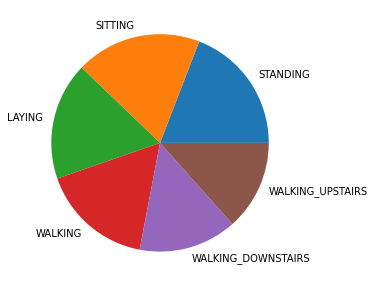

In [81]:
plt.figure(figsize=(15,5))
plt.pie(np.array(y_train.value_counts()), labels=y_train.unique())
plt.show()

In [82]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lb = LabelEncoder()
y_train = pd.get_dummies(lb.fit_transform(y_train)).values
y_test = pd.get_dummies(lb.transform(y_test)).values

pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# explained_variance_ratio = pca.explained_variance_ratio_

In [83]:
model = Sequential()
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=6, activation='softmax', kernel_initializer='uniform'))

In [84]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
history = model.fit(X_train, y_train, batch_size=256, epochs=20, 
                    verbose=1, validation_data=(X_test, y_test) )

Epoch 1/20
29/29 [==============================] - 0s 10ms/step - loss: 1.5555 - accuracy: 0.6404 - val_loss: 1.0389 - val_accuracy: 0.7811
Epoch 2/20
29/29 [==============================] - 0s 5ms/step - loss: 0.6180 - accuracy: 0.8385 - val_loss: 0.2749 - val_accuracy: 0.9376
Epoch 3/20
29/29 [==============================] - 0s 5ms/step - loss: 0.1052 - accuracy: 0.9723 - val_loss: 0.1467 - val_accuracy: 0.9450
Epoch 4/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.1625 - val_accuracy: 0.9444
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.1268 - val_accuracy: 0.9555
Epoch 6/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.1405 - val_accuracy: 0.9532
Epoch 7/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.1366 - val_accuracy: 0.9549
Epoch 8/20
29/29 [=

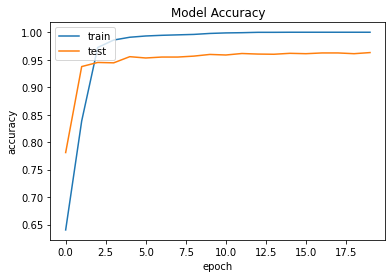

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

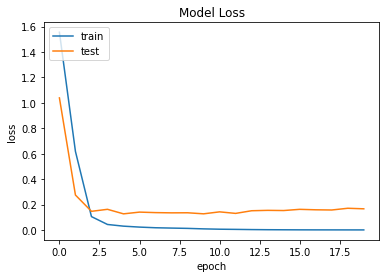

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([2, 2, 2, ..., 5, 5, 5])

In [89]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([2, 2, 2, ..., 5, 5, 5])

In [90]:
confusion = confusion_matrix(y_test_class, y_pred_class)
acc = accuracy_score(y_test_class, y_pred_class)

In [91]:
confusion

array([[534,   0,   0,   0,   0,   3],
       [  2, 445,  43,   0,   0,   1],
       [  0,  16, 516,   0,   0,   0],
       [  0,   0,   0, 495,   0,   1],
       [  0,   0,   0,   4, 407,   9],
       [  0,   0,   0,  27,   3, 441]])

In [92]:
acc

0.9630132337970818